In [32]:
#Importing necessary libraries
import pandas as pd 
import warnings as w 
from sklearn.preprocessing import MinMaxScaler

#Suppress warnings
w.simplefilter("ignore")

In [33]:
# Loading the dataset
df = pd.read_csv("D:/DataSets/Automobile_data2.csv")
df.head(25)

,Unnamed: 0,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.00,111.0,5000.0,21,27,13495.0
1,1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.00,111.0,5000.0,21,27,16500.0
2,2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.00,154.0,5000.0,19,26,16500.0
3,3,2,164,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.00,102.0,5500.0,24,30,13950.0
4,4,2,164,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.00,115.0,5500.0,18,22,17450.0
5,5,2,?,audi,gas,std,two,sedan,fwd,front,...,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,15250.0
6,6,1,158,audi,gas,std,four,sedan,fwd,front,...,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,17710.0
7,7,1,?,audi,gas,std,four,wagon,fwd,front,...,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,18920.0
8,8,1,158,audi,gas,turbo,four,sedan,fwd,front,...,131,mpfi,3.13,3.40,8.30,140.0,5500.0,17,20,23875.0
9,9,0,?,audi,gas,turbo,two,hatchback,4wd,front,...,131,mpfi,3.13,3.40,7.00,160.0,5500.0,16,22,NaN


In [34]:
#Understanding the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         205 non-null    int64  
 1   symboling          205 non-null    int64  
 2   normalized-losses  205 non-null    object 
 3   make               205 non-null    object 
 4   fuel-type          205 non-null    object 
 5   aspiration         205 non-null    object 
 6   num-of-doors       205 non-null    object 
 7   body-style         205 non-null    object 
 8   drive-wheels       205 non-null    object 
 9   engine-location    205 non-null    object 
 10  wheel-base         205 non-null    float64
 11  length             205 non-null    float64
 12  width              205 non-null    float64
 13  height             205 non-null    float64
 14  curb-weight        205 non-null    int64  
 15  engine-type        205 non-null    object 
 16  num-of-cylinders   205 non

In [35]:
df.describe()

,Unnamed: 0,symboling,wheel-base,length,width,height,curb-weight,engine-size,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,102.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,0.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,51.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,102.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,153.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,204.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [36]:
df.isnull().sum()

Unnamed: 0           0
symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64

In [37]:
#Handling missing data by replacing nulls with the column mean
columns_to_fill = ['stroke', 'horsepower', 'peak-rpm', 'price']

#Replace null values with the mean of the column
for column in columns_to_fill:
    df[column].fillna(df[column].mean(), inplace=True)

#Verify the changes
print(df[columns_to_fill].isnull().sum())

stroke        0
horsepower    0
peak-rpm      0
price         0
dtype: int64


Selected columns with missing values and replaced their nulls with the mean of each column. Afterward, we check if any nulls remain.

In [38]:
#Identifying columns with missing or invalid values (? symbol)
c= {col: df[df[col]=="?"].shape[0] for col in df.columns}
c

{'Unnamed: 0': 0,
 'symboling': 0,
 'normalized-losses': 41,
 'make': 0,
 'fuel-type': 0,
 'aspiration': 0,
 'num-of-doors': 2,
 'body-style': 0,
 'drive-wheels': 0,
 'engine-location': 0,
 'wheel-base': 0,
 'length': 0,
 'width': 0,
 'height': 0,
 'curb-weight': 0,
 'engine-type': 0,
 'num-of-cylinders': 0,
 'engine-size': 0,
 'fuel-system': 0,
 'bore': 4,
 'stroke': 0,
 'compression-ratio': 0,
 'horsepower': 0,
 'peak-rpm': 0,
 'city-mpg': 0,
 'highway-mpg': 0,
 'price': 0}

In [39]:
for i, j in enumerate(c.items()):
    if (j[1]!=0):
        print(str(i)+". "+j[0]+" : "+str(j[1]))

2. normalized-losses : 41
6. num-of-doors : 2
19. bore : 4


This code identifies columns with ? values, which may represent missing data. It prints out these columns and how many invalid entries they contain.

In [40]:
#Replacing ? values with NaN
import numpy as np
for i in range (df.shape[1]):
    for j in range (df.shape[0]):
        if (df.iloc[j,i]=='?'):
            df.iloc[j,i]=np.NaN

Loops through the dataset and replaces any ? with NaN so we can later handle them properly.

In [41]:
import seaborn as sns

<AxesSubplot:>

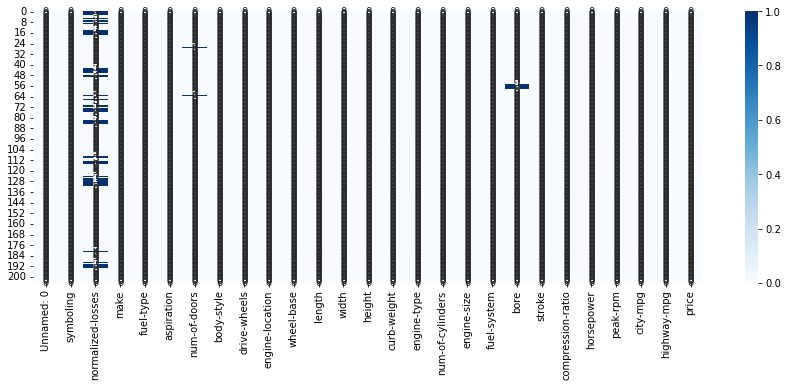

In [42]:
#Visualizing missing dataimport matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,5))
sns.heatmap(df.isnull(),annot=True, ax=ax, cbar=True, cmap='Blues')

Using a heatmap from matplotlib and seaborn, we visualize the missing values across the dataset.

In [43]:
df.shape

(205, 27)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         205 non-null    int64  
 1   symboling          205 non-null    int64  
 2   normalized-losses  164 non-null    object 
 3   make               205 non-null    object 
 4   fuel-type          205 non-null    object 
 5   aspiration         205 non-null    object 
 6   num-of-doors       203 non-null    object 
 7   body-style         205 non-null    object 
 8   drive-wheels       205 non-null    object 
 9   engine-location    205 non-null    object 
 10  wheel-base         205 non-null    float64
 11  length             205 non-null    float64
 12  width              205 non-null    float64
 13  height             205 non-null    float64
 14  curb-weight        205 non-null    int64  
 15  engine-type        205 non-null    object 
 16  num-of-cylinders   205 non

In [45]:
#Filling missing values in a specific column with a constant value
print("median: "+ str(df['normalized-losses'].median()))

median: 115.0


In [46]:
df["normalized-losses"] = df["normalized-losses"].apply(lambda x: 115.0 if pd.isnull(x) else x)

Here, we replace missing values in the normalized-losses column with the constant value of 115.0. The median of the column is printed for reference.

In [47]:
#Dropping rows with remaining missing data
df.dropna(inplace=True)

Rows with any remaining missing data are dropped from the dataset.

In [48]:
#Converting specific columns to numeric data types
df["normalized-losses"]=pd.to_numeric(df["normalized-losses"])
df["bore"]=pd.to_numeric(df["bore"])
df["stroke"]=pd.to_numeric(df["stroke"])
df["horsepower"]=pd.to_numeric(df["horsepower"])
df["peak-rpm"]=pd.to_numeric(df["peak-rpm"])
df["price"]=pd.to_numeric(df["price"])

Converting columns to numeric ensures the data is correctly typed for analysis and model training.

In [49]:
df.dtypes

Unnamed: 0             int64
symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [50]:
#Dropping unnecessary columns
df = df.drop(columns=['Unnamed: 0'])
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,115.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


We remove an Unnamed: 0 column, likely added by accident during the CSV loading, and check the first few rows after cleanup.

In [51]:
#Encoding categorical variables
from sklearn.preprocessing import LabelEncoder
fit = LabelEncoder()
df["make"] = fit.fit_transform(df["make"])
df["fuel-type"] = fit.fit_transform(df["fuel-type"])
df["aspiration"] = fit.fit_transform(df["aspiration"])
df["num-of-doors"] = fit.fit_transform(df["num-of-doors"])
df["body-style"] = fit.fit_transform(df["body-style"])
df["drive-wheels"] = fit.fit_transform(df["drive-wheels"])
df["engine-location"] = fit.fit_transform(df["engine-location"])
df["fuel-system"] = fit.fit_transform(df["fuel-system"])
df["engine-type"] = fit.fit_transform(df["engine-type"])
df["num-of-cylinders"] = fit.fit_transform(df["num-of-cylinders"])
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115.0,0,1,0,1,0,2,0,88.6,...,130,4,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,115.0,0,1,0,1,0,2,0,88.6,...,130,4,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,115.0,0,1,0,1,2,2,0,94.5,...,152,4,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,1,1,0,0,3,1,0,99.8,...,109,4,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,1,1,0,0,3,0,0,99.4,...,136,4,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,21,1,0,0,3,2,0,109.1,...,141,4,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,21,1,1,0,3,2,0,109.1,...,141,4,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,21,1,0,0,3,2,0,109.1,...,173,4,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,21,0,1,0,3,2,0,109.1,...,145,2,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


Categorical features like make, fuel-type, etc., are converted into numerical representations using LabelEncoder, which assigns a unique integer to each category.

In [52]:
#Categorizing columns
cat_features=['symboling','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','fuel-system', 'engine-type', 'num-of-cylinders'] 
num_features= list(set(df.columns)-set(cat_features)-{'price'})
print ('No. of Categorical features: ',len(cat_features))
print('-'*117);print (cat_features);print('-'*117)
print('No. of Numerical features: ', len(num_features))
print('-'*117); print(num_features); print('-'*117)

No. of Categorical features:  11
---------------------------------------------------------------------------------------------------------------------
['symboling', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'fuel-system', 'engine-type', 'num-of-cylinders']
---------------------------------------------------------------------------------------------------------------------
No. of Numerical features:  14
---------------------------------------------------------------------------------------------------------------------
['horsepower', 'compression-ratio', 'curb-weight', 'peak-rpm', 'wheel-base', 'normalized-losses', 'height', 'stroke', 'bore', 'engine-size', 'width', 'length', 'city-mpg', 'highway-mpg']
---------------------------------------------------------------------------------------------------------------------


Here, I categorize the features into categorical and numerical groups and print the count of each for clarity.

In [53]:
df[num_features]

,horsepower,compression-ratio,curb-weight,peak-rpm,wheel-base,normalized-losses,height,stroke,bore,engine-size,width,length,city-mpg,highway-mpg
0,111.0,9.0,2548,5000.0,88.6,115.0,48.8,2.68,3.47,130,64.1,168.8,21,27
1,111.0,9.0,2548,5000.0,88.6,115.0,48.8,2.68,3.47,130,64.1,168.8,21,27
2,154.0,9.0,2823,5000.0,94.5,115.0,52.4,3.47,2.68,152,65.5,171.2,19,26
3,102.0,10.0,2337,5500.0,99.8,164.0,54.3,3.40,3.19,109,66.2,176.6,24,30
4,115.0,8.0,2824,5500.0,99.4,164.0,54.3,3.40,3.19,136,66.4,176.6,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,114.0,9.5,2952,5400.0,109.1,95.0,55.5,3.15,3.78,141,68.9,188.8,23,28
201,160.0,8.7,3049,5300.0,109.1,95.0,55.5,3.15,3.78,141,68.8,188.8,19,25
202,134.0,8.8,3012,5500.0,109.1,95.0,55.5,2.87,3.58,173,68.9,188.8,18,23
203,106.0,23.0,3217,4800.0,109.1,95.0,55.5,3.40,3.01,145,68.9,188.8,26,27


In [54]:
#Scaling the numerical data
num_scaled = pd.DataFrame(MinMaxScaler().fit_transform(df[num_features]),columns=num_features)

We use MinMaxScaler to scale the numerical features, transforming them to values between 0 and 1. This is essential for machine learning algorithms that are sensitive to feature scaling.

In [55]:
#Concatenating the processed data
final_scaled_data = pd.concat([num_scaled, df[cat_features], df['price']], axis=1, ignore_index=True, join='inner')
final_scaled_data


,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.262500,0.12500,0.411171,0.346939,0.058309,0.261780,0.083333,0.290476,0.664286,0.260377,...,1,0,1,0,2,0,4,0,2,13495.0
1,0.262500,0.12500,0.411171,0.346939,0.058309,0.261780,0.083333,0.290476,0.664286,0.260377,...,1,0,1,0,2,0,4,0,2,16500.0
2,0.441667,0.12500,0.517843,0.346939,0.230321,0.261780,0.383333,0.666667,0.100000,0.343396,...,1,0,1,2,2,0,4,5,3,16500.0
3,0.225000,0.18750,0.329325,0.551020,0.384840,0.518325,0.541667,0.633333,0.464286,0.181132,...,1,0,0,3,1,0,4,3,2,13950.0
4,0.279167,0.06250,0.518231,0.551020,0.373178,0.518325,0.541667,0.633333,0.464286,0.283019,...,1,0,0,3,0,0,4,3,1,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,0.275000,0.15625,0.567882,0.510204,0.655977,0.157068,0.641667,0.514286,0.885714,0.301887,...,1,0,0,3,2,0,4,3,2,12940.0
195,0.466667,0.10625,0.605508,0.469388,0.655977,0.157068,0.641667,0.514286,0.885714,0.301887,...,1,0,0,4,2,0,4,3,2,13415.0
196,0.358333,0.11250,0.591156,0.551020,0.655977,0.157068,0.641667,0.380952,0.742857,0.422642,...,1,0,0,3,2,0,4,3,2,15985.0
197,0.241667,1.00000,0.670675,0.265306,0.655977,0.157068,0.641667,0.633333,0.335714,0.316981,...,1,0,0,4,2,0,4,3,2,16515.0


Finally, we concatenate the scaled numerical data, categorical data, and the target variable (price) into a single dataframe for further use.
